In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from stemgraphic import stem_graphic

import warnings
warnings.filterwarnings('ignore')
sns.set_context('talk')

<img src ='datascicon.jpg' width="20%">

# Seeking Exotics

## A Story of Visualization and Model Based Anomaly Detection

Francois Dion [@f_dion](http://www.twitter.com/f_dion),  [linkedin.com](https://www.linkedin.com/in/francois-dion-8b639b79/) and [fdion@dionresearch.com](mailto:fdion@dionresearch.com)

Francois is the founder of [PYPTUG](http://www.pyptug.org) (PYthon Piedmont Triad User Group) and owner of R&D firm [Dion Research LLC](http://www.dionresearch.com), specializing in Analytics, Data Science, IoT and Visualizations.

Listen to the podcast "Something for your mind", [A is for Anomaly](http://artchiv.es/s4ym/posts/podcast-episode-002/) for background information and [www.stemgraphic.org](http://www.stemgraphic.org) for details on my scalable graphical stem-and-leaf tool and module.

__the truth is out there__ [github.com/fdion/seeking_atlanta](http://github.com/fdion/seeking_atlanta)

"Is it right to hold that the several observations are of the same weight or moment, or equally prone to any and every error?"
-- Daniel Bernoulli, 1777


## Intro

Seeking Exotics introduces the audience to the world of outliers and anomaly detection through the use of __metrics__, __visualizations__ and open source __machine learning__ tools.

Anomaly detection, particularly in the case of fraud detection has been around for a long time. Having said that, we probably can use anomaly detection in every aspect of our lives and of business. As to what to do with outliers, Bernoulli's choice, or absence of one, still plagues us to-day.




# Statistics

<img src='normal.jpg'>
(In W.J. Youdon's _Experimentation and Measurement_). When everything is normal, it's all good.

In [3]:
np.random.seed(42)
# mean, std dev, number in population
pop = np.random.normal(loc=500, scale=100, size=500)

# Distplot

We will use [seaborn](http://seaborn.pydata.org/) with some normally distributed data (from a PRNG in numpy)

```python
np.random.seed(42)
# mean, std dev, number in population
pop = np.random.normal(loc=500, scale=100, size=500)
```

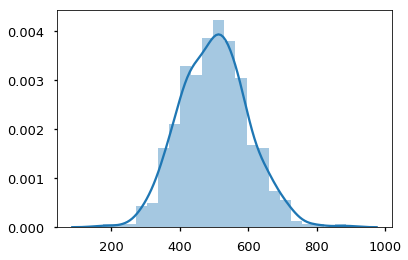

In [4]:
sns.distplot(pop);

In [5]:
print(pop.mean(), pop.std())

500.683799459 98.0271502997


Alternative to the rug plot is Tukey's box plot

To learn more about all the options to seaborn's boxplot, type:
```python
help(sns.boxplot)
```

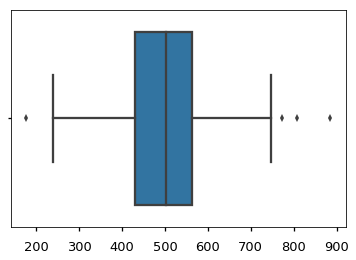

In [6]:
sns.boxplot(pop);

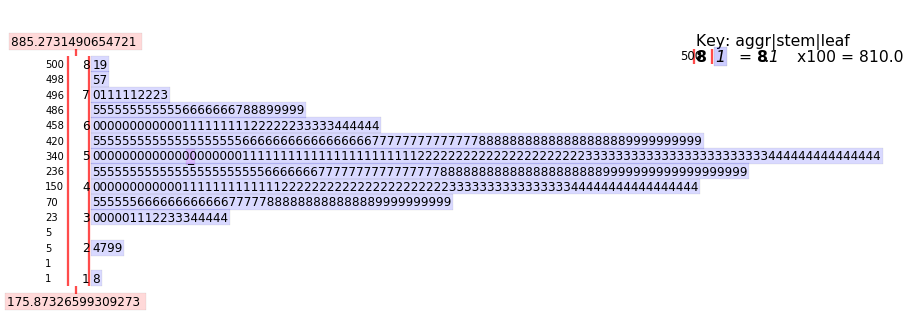

In [7]:
stem_graphic(pop);

# Distplot and boxplot

If you can't live without a histogram

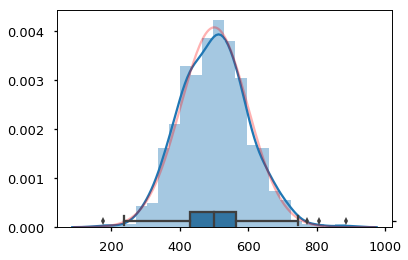

In [8]:
ax = sns.distplot(pop, fit=stats.norm, fit_kws={'color': 'r', 'alpha': 0.3})
ax2 = ax.twinx()
sns.boxplot(x=pop, ax=ax2)
ax2.set(ylim=(-.3, 9.7));

<img src='compound_viz.png'>

# Graphic Presentation

Why valuable?

5 points from Calvin F. Schmid

# Estimate vs. Actual

<img src='double_log.jpg' width=30%>

# Ship & French curves

<img src='curves.jpg' width=50%>

## The eye and the brain

F. J. Anscombe's paper "Graphs in Statistical Analysis" (1973) demonstrated why graphs are essential to good statistical analysis. We will not go into the details of this paper (<a href="http://www.sjsu.edu/faculty/gerstman/StatPrimer/anscombe1973.pdf">feel free to read it afterward</a>). Instead, we will borrow the data set from his 3rd plot.

In [9]:
anscombe = sns.load_dataset("anscombe")
anscombe_3 = anscombe[anscombe.dataset=='III']

In [10]:
anscombe_3

,dataset,x,y
22,III,10.0,7.46
23,III,8.0,6.77
24,III,13.0,12.74
25,III,9.0,7.11
26,III,11.0,7.81
27,III,14.0,8.84
28,III,6.0,6.08
29,III,4.0,5.39
30,III,12.0,8.15
31,III,7.0,6.42


it could be that easy...


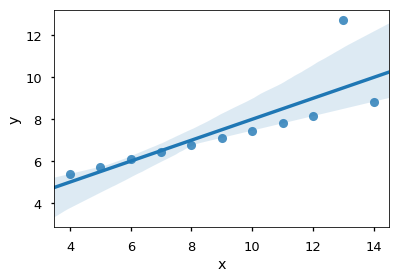

In [11]:
sns.regplot("x", "y", data=anscombe_3)

# statsmodel OLS

y (endogenous response variable) first
then X for statsmodels

In [12]:
results = sm.OLS(anscombe_3.y, anscombe_3.x).fit()

In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     257.7
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           1.82e-08
Time:                        11:58:00   Log-Likelihood:                -20.047
No. Observations:                  11   AIC:                             42.09
Df Residuals:                      10   BIC:                             42.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.7967      0.050     16.053      0.000       0.686       0.907
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.614
Skew:                          -0.215   Prob(JB):                        0.735
Kurtosis:                       1.925   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
residuals = pd.Series(results.resid, name="Residuals")

In [15]:
residuals

22   -0.506733
23    0.396613
24    2.383247
25   -0.060060
26   -0.953407
27   -2.313427
28    1.299960
29    2.203307
30   -1.410080
31    0.843287
32    1.746633
Name: Residuals, dtype: float64

In [16]:
influence = results.get_influence()

In [17]:
influence.summary_table()

obs,endog,fitted,Cook's,student.,hat diag,dffits,ext.stud.,dffits
,,value,d,residual,,internal,residual,
0.0,7.46,7.96673326673,0.0128431454286,-0.340171633609,0.0999000999001,-0.113327602236,-0.324598687157,-0.108139501564
1.0,6.77,6.37338661339,0.00465583605052,0.261083032151,0.0639360639361,0.0682336870652,0.248533617042,0.0649539148934
2.0,12.74,10.3567532468,0.56304126026,1.66490102863,0.168831168831,0.750360753411,1.85779360261,0.83729626168
3.0,7.11,7.17005994006,0.00014016555549,-0.0398999228086,0.0809190809191,-0.0118391534955,-0.0378554037794,-0.0112325013291
4.0,7.81,8.76340659341,0.0576684764003,-0.647616476854,0.120879120879,-0.240142616793,-0.62768673566,-0.232752470968
5.0,8.84,11.1534265734,0.657261055273,-1.64300488388,0.195804195804,-0.810716383992,-1.82424332935,-0.900145806019
6.0,6.08,4.78003996004,0.0265258939274,0.843232662634,0.035964035964,0.162867719108,0.830013507158,0.16031448108
7.0,5.39,3.18669330669,0.0325057041759,1.41461387429,0.015984015984,0.180293383616,1.50053079998,0.191243547138
8.0,8.15,9.56007992008,0.15828889744,-0.970586825306,0.143856143856,-0.397855372516,-0.967476485458,-0.396580406293


In [18]:
# Studentized residuals
influence.summary_frame().sort_values(by='student_resid', ascending=False)

,dfb_x,cooks_d,dffits,dffits_internal,hat_diag,standard_resid,student_resid
24,0.837296,0.563041,0.837296,0.750361,0.168831,1.664901,1.857794
29,0.191244,0.032506,0.191244,0.180293,0.015984,1.414614,1.500531
32,0.183061,0.032509,0.183061,0.180303,0.024975,1.126569,1.143803
28,0.160314,0.026526,0.160314,0.162868,0.035964,0.843233,0.830014
31,0.120372,0.015611,0.120372,0.124945,0.048951,0.550729,0.530575
23,0.064954,0.004656,0.064954,0.068234,0.063936,0.261083,0.248534
25,-0.011233,0.000140,-0.011233,-0.011839,0.080919,-0.039900,-0.037855
22,-0.108140,0.012843,-0.108140,-0.113328,0.099900,-0.340172,-0.324599
26,-0.232752,0.057668,-0.232752,-0.240143,0.120879,-0.647616,-0.627687
30,-0.396580,0.158289,-0.396580,-0.397855,0.143856,-0.970587,-0.967476


In [19]:
clean = anscombe_3.drop(anscombe.index[24])

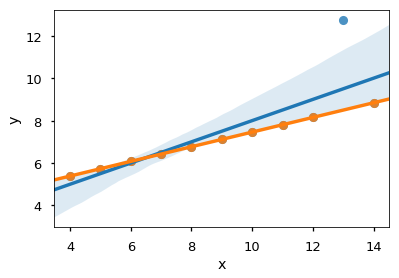

In [21]:
ax = sns.regplot("x", "y", data=anscombe_3)
sns.regplot("x", "y", data=clean, ax=ax);